# Notebook for Visualizing and Analyzing Simulated Trajectories

Written by L.F. Heald

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gued_theory as gt
import gued
import scipy.optimize
import scipy.special
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import h5py 

angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/' # The molecular .xyz/.csv paths



## Load Data

In [12]:
file_path = 'C:\\Users\\laure\\OneDrive - University of Nebraska-Lincoln\\Documents\\Centurion Lab\\QC data and code\\Theory Structures\\'
file_name = file_path + "NB_Trajectories_2024-09-05.h5"
print(file_name)
gt.inspect_h5(file_name)

C:\Users\laure\OneDrive - University of Nebraska-Lincoln\Documents\Centurion Lab\QC data and code\Theory Structures\NB_Trajectories_2024-09-05.h5
Group: s2
Dataset: s2/dI_I_conv_run_0008
Dataset: s2/dI_I_conv_run_0020
Dataset: s2/dI_I_conv_run_0037
Dataset: s2/dI_I_conv_run_0068
Dataset: s2/dI_I_conv_run_0070
Dataset: s2/dI_I_conv_run_0079
Dataset: s2/dI_I_conv_run_0090
Dataset: s2/dI_I_conv_run_0107
Dataset: s2/dI_I_conv_run_0115
Dataset: s2/dI_I_conv_run_0128
Dataset: s2/dI_I_conv_run_0142
Dataset: s2/dI_I_conv_run_0149
Dataset: s2/dI_I_conv_run_0236
Dataset: s2/dI_I_conv_run_0237
Dataset: s2/dI_I_conv_run_0238
Dataset: s2/dI_I_conv_run_0267
Dataset: s2/dI_I_conv_run_0275
Dataset: s2/dI_I_conv_run_0278
Dataset: s2/dI_I_conv_run_0285
Dataset: s2/dI_I_conv_run_0308
Dataset: s2/dI_I_conv_run_0354
Dataset: s2/dI_I_conv_run_0372
Dataset: s2/dI_I_conv_run_0398
Dataset: s2/dI_I_conv_run_0409
Dataset: s2/dI_I_conv_run_0489
Dataset: s2/dI_I_conv_run_0499
Dataset: s2/dI_I_conv_run_0512
Dataset

In [18]:
group_name = "s4"

s2_trajectories = gt.load_trajectory_h5(file_name, group_name)

print(f"{len(s2_trajectories)} trajectories in this group")

30 trajectories in this group


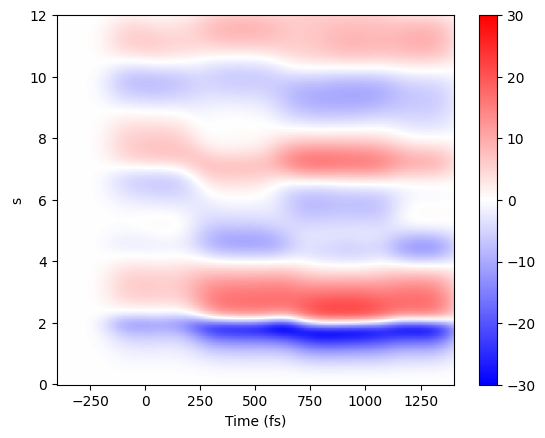

In [28]:
plt.figure()
plt.pcolor(s2_trajectories["0175"]["time"], s2_trajectories["0175"]["s"], s2_trajectories["0220"]["dI_I_conv"].T, cmap="bwr")
plt.colorbar()
plt.clim(vmin=-30, vmax=30)
plt.xlabel("Time (fs)")
plt.ylabel("s")
plt.show()

(2800,)


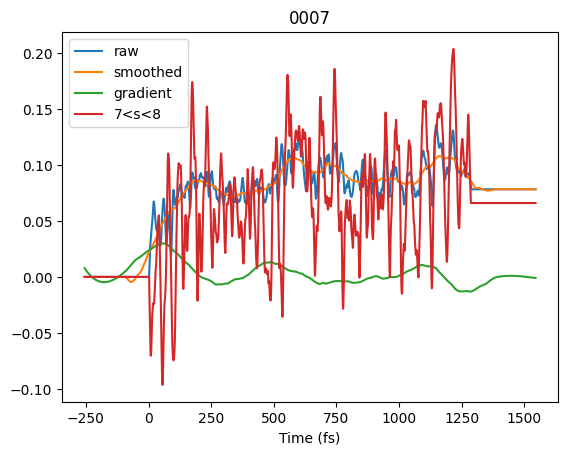

(2800,)


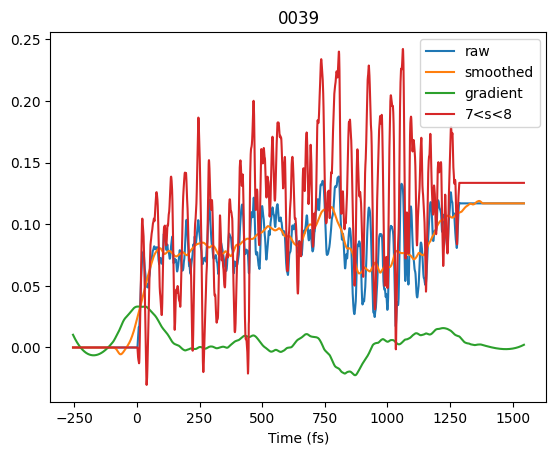

(2800,)


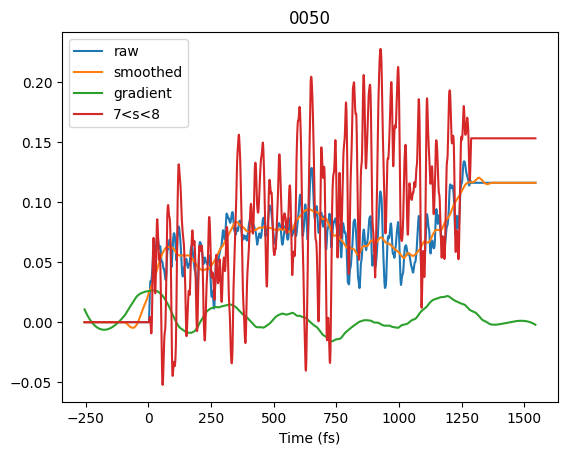

(2800,)


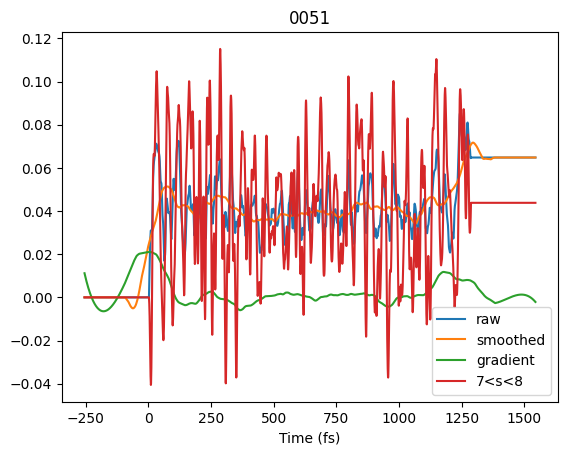

(2800,)


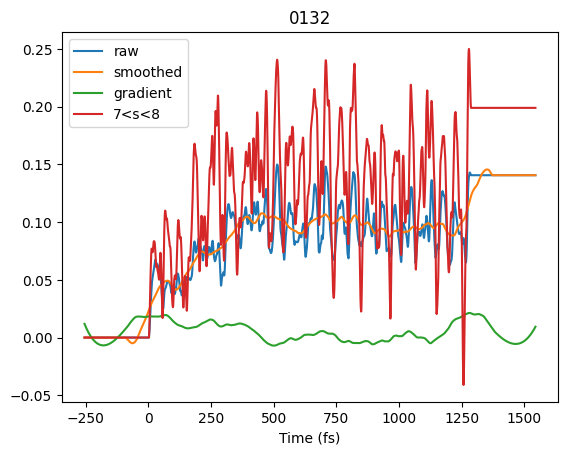

(2800,)


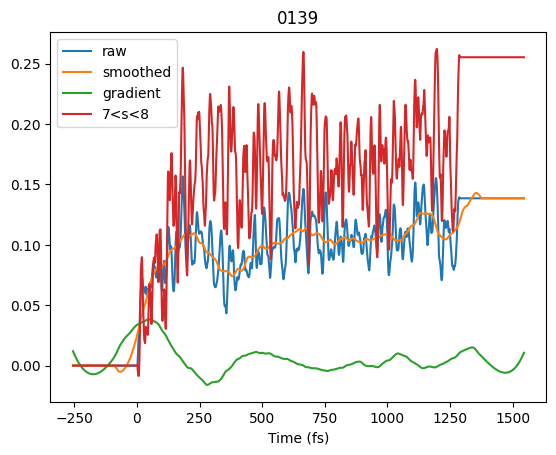

(2800,)


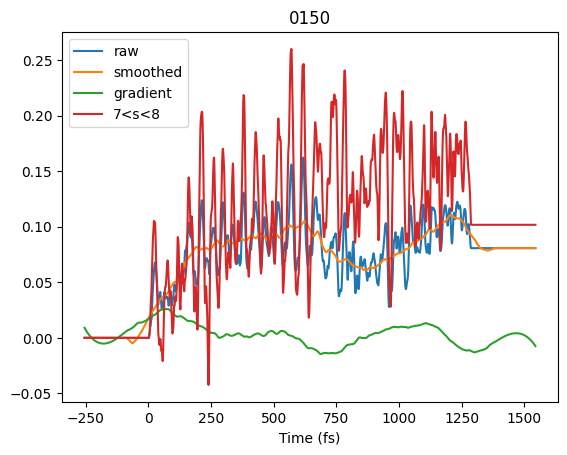

(2800,)


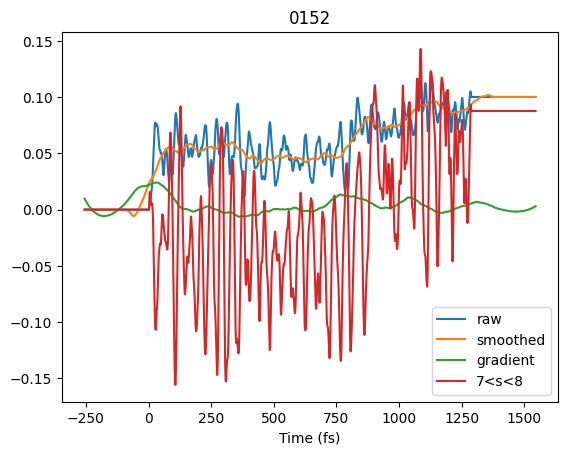

(2800,)


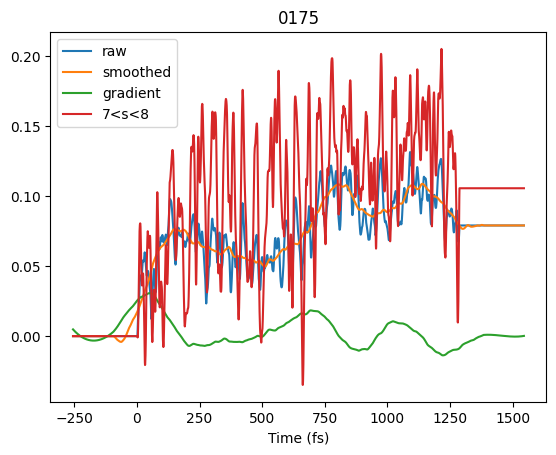

(2800,)


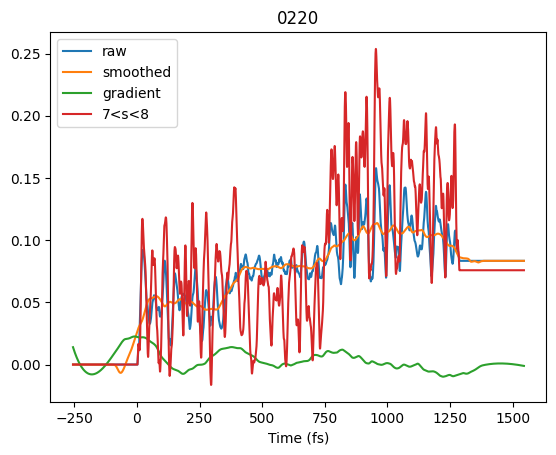

(2800,)


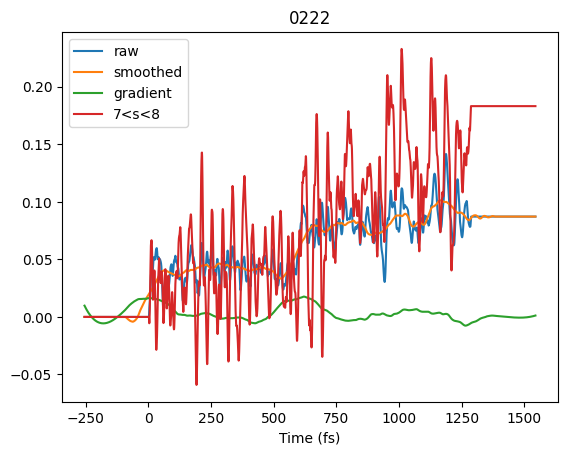

(2800,)


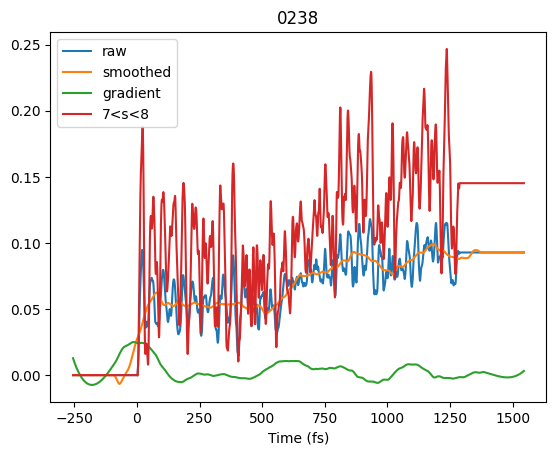

(2800,)


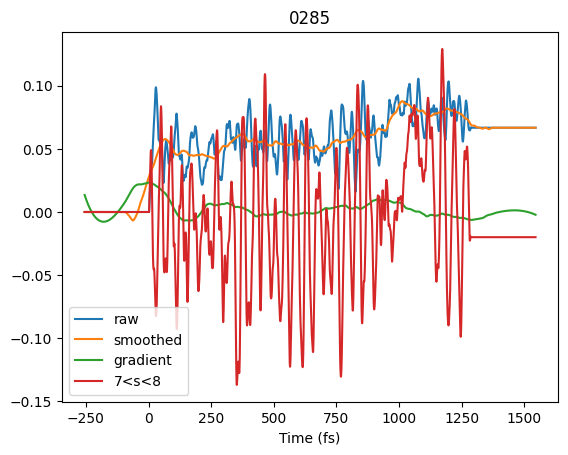

(2800,)


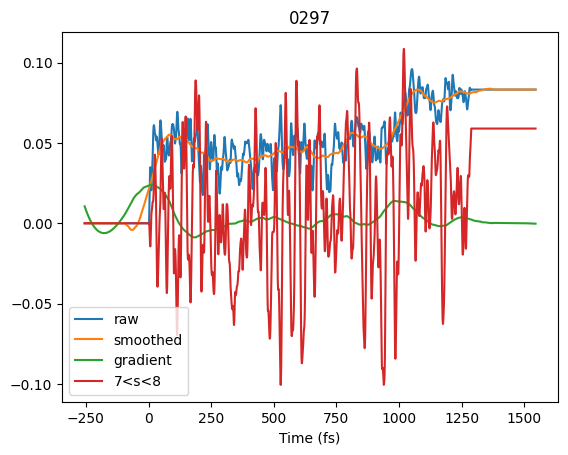

(2800,)


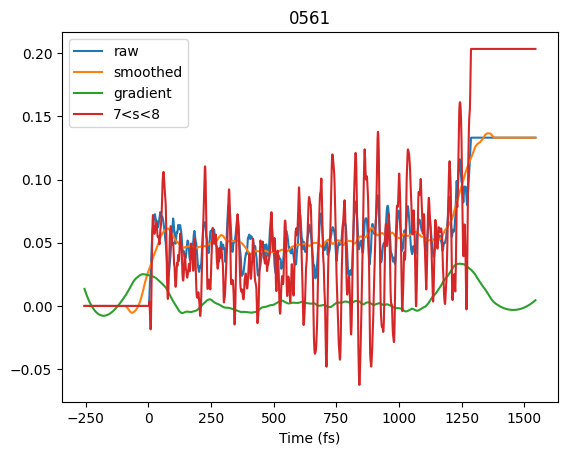

(2800,)


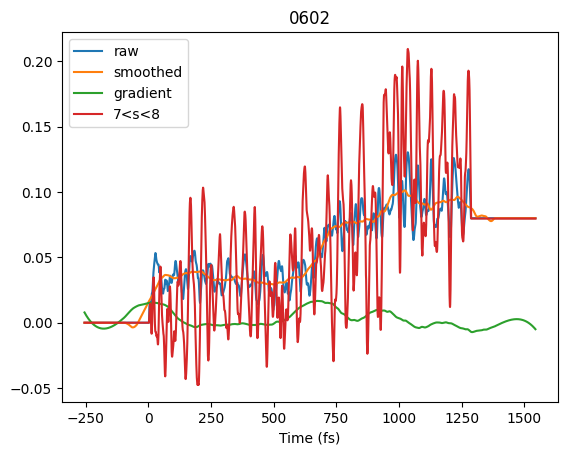

(2800,)


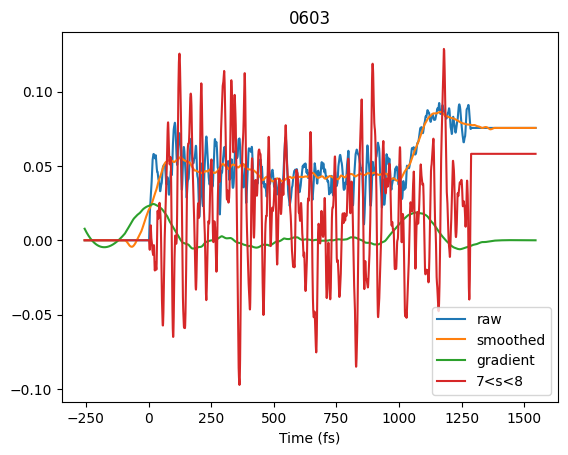

(2800,)


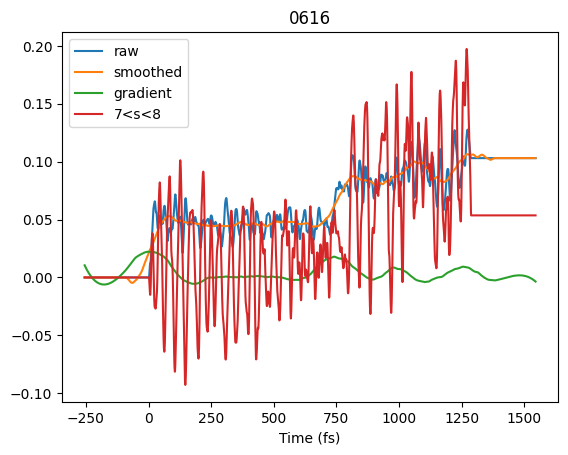

(2800,)


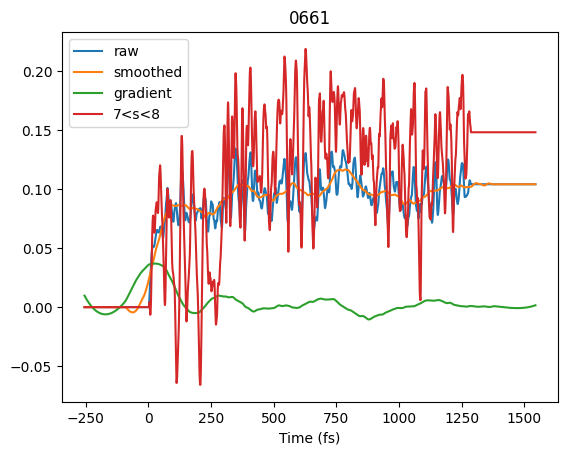

(2800,)


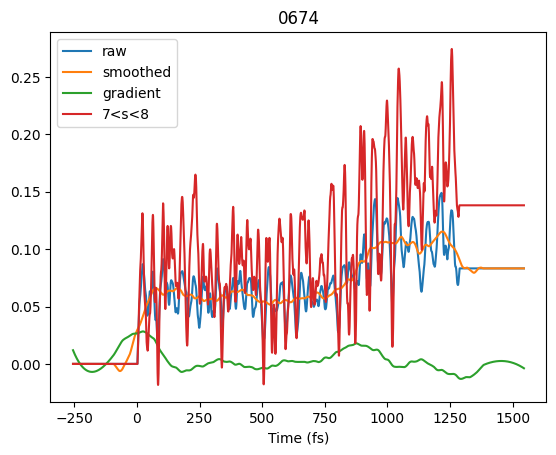

(2800,)


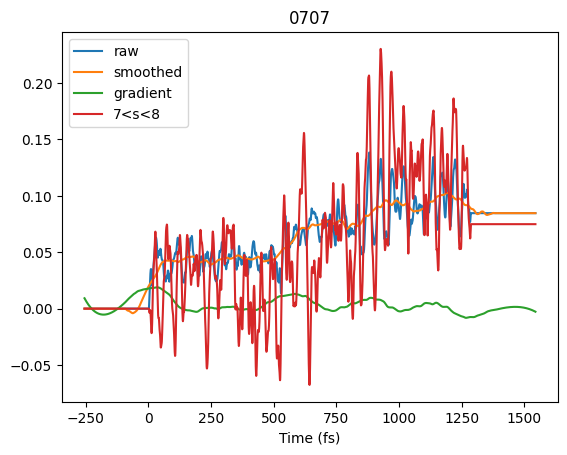

(2800,)


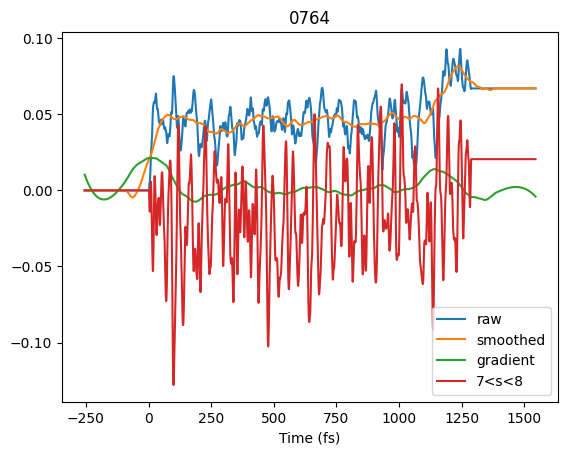

(2800,)


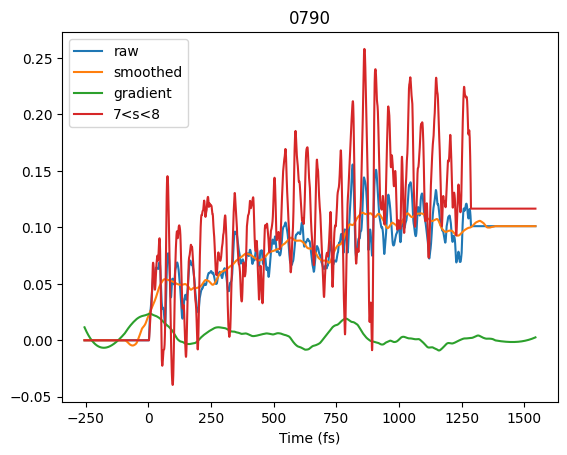

(2800,)


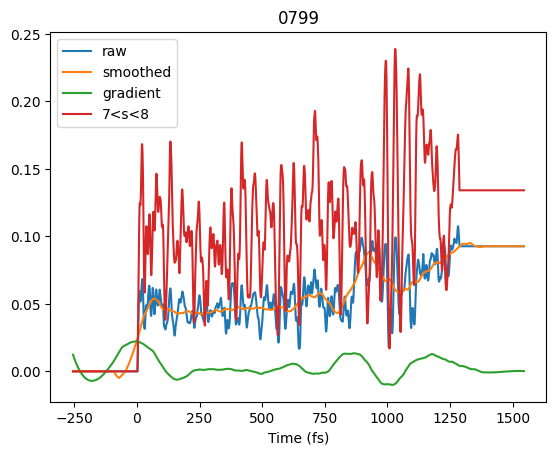

(2800,)


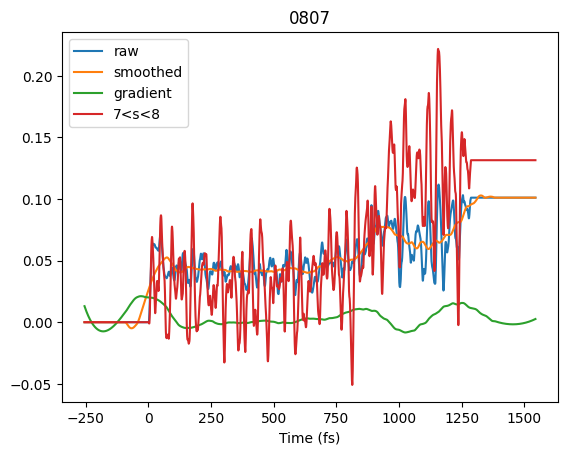

(2800,)


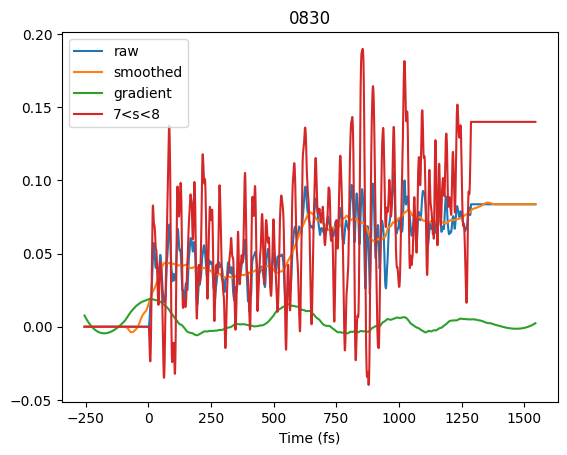

(2800,)


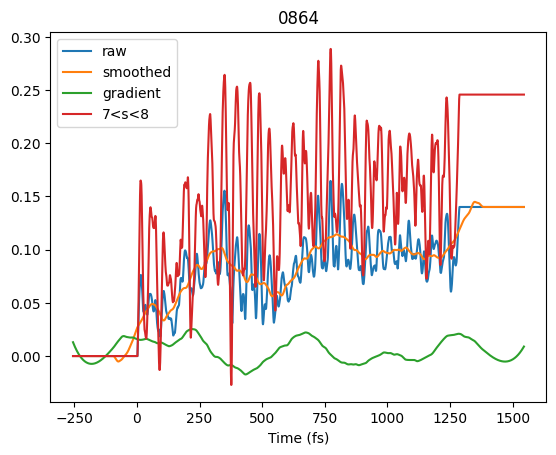

(2800,)


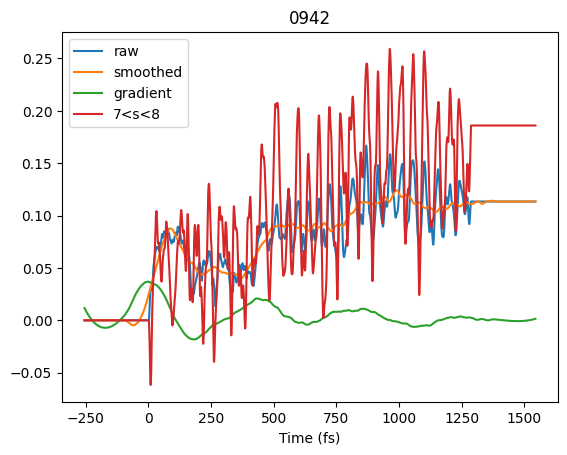

(2800,)


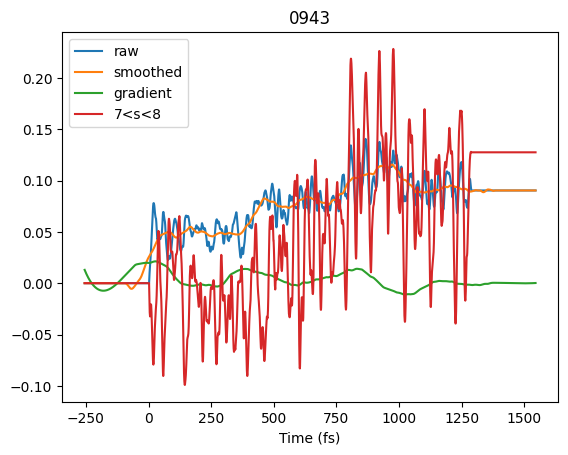

(2800,)


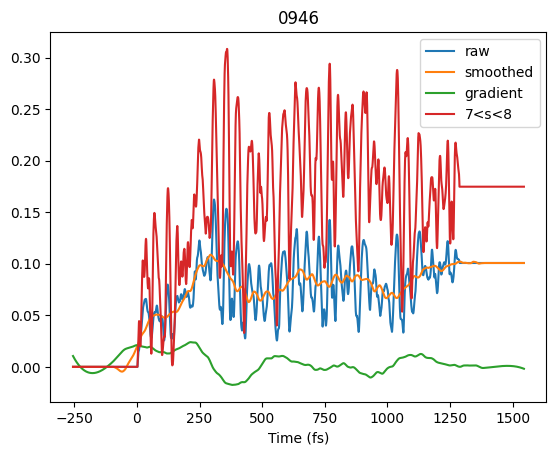

In [30]:
# Define the error function using scipy.special.erf
def error_function(t, a, t0, sigma, offset):
    return a * scipy.special.erf((t-t0)/(sigma/(np.sqrt(2*np.log(2))))*np.sqrt(2)) + offset

# Define bounds for the parameters [amplitude, t0, sigma, offset]
bounds = ([-1, 250, 0, -1], [10, 1000, 1500, 1])  # lower bounds, upper bounds
guesses = [5, 0, 500, 0.0]

for key in s2_trajectories.keys():
    data = s2_trajectories[key]["dI_I_raw"].T
    time_vals = s2_trajectories[key]["time"] + 145
    mean_data = np.sum(np.abs(data), axis=0)  # average the absolute value of all the data across s range
    feat_1 = np.mean(data[np.where((s2_trajectories[key]["s"] > 7) & (s2_trajectories[key]["s"] < 8))[0]], axis=0)
    
    # Fit absolute value of all data
    # popt, pcov = scipy.optimize.curve_fit(error_function, time_vals[0:1000], mean_data[0:1000])
    # A, t0, sigma, offset = popt
    # t0_error = np.sqrt(pcov[1, 1])
    # sigma_error = np.sqrt(pcov[2, 2])

    # # Generate the fit line
    # fit_line = error_function(time_vals, A, t0, sigma, offset)
    # print("Run_Number\tt_0\t\tt_error\tsigma\tsigma_error\toffset\n")
    # print(f"{key}\t{t0:.4f}\t{t0_error:.3f}\t{sigma:.4f}\t{sigma_error:.3f}\t{offset:.4f}\n")

    # plt.figure()
    # plt.plot(time_vals, mean_data, label="Trajectory Data")
    # plt.plot(time_vals, fit_line, label="fit")
    # plt.legend()
    # plt.title(key)
    # plt.show()

    test_data = np.mean(np.abs(s2_trajectories[key]["dI_I_raw"].T), axis=0)
    conv_data = np.mean(np.abs(s2_trajectories[key]["dI_I_conv"].T), axis=0)
    print(test_data.shape)
    smooth_data = savgol_filter(test_data, 301, 3)

    grad = savgol_filter(np.gradient(smooth_data), 501, 3)
    threshold = np.max(np.abs(grad))*0.5

    #changes = np.where(np.abs(grad) > threshold)[0]

    peaks, _ = find_peaks(grad, height=(np.max(grad)/4))
    peak_height = grad[peaks]
    valleys, _ = find_peaks((-1*grad), height=(np.max(grad)/4))
    valley_height = grad[valleys]
    all_changes = np.concatenate((peaks, valleys))
    all_changes = np.sort(all_changes)
    plt.figure()
    plt.plot(time_vals, test_data, label="raw")
    plt.plot(time_vals, smooth_data, label="smoothed")
    #plt.plot(time_vals, conv_data/100, label="convolved")
    #plt.plot(time_vals[all_changes], grad[all_changes]*100, "x", color="black")
    #plt.plot(time_vals[valleys], grad[valleys]*100, "x", color="black")
    plt.plot(time_vals, grad*100, label="gradient")
    plt.plot(time_vals, feat_1, label="7<s<8")
    plt.xlabel("Time (fs)")
    plt.legend()
    plt.title(key)
    plt.show()
    # for idx in all_changes:
    #     print(f"Local change at time {time_vals[idx]:.2f}, value {smooth_data[idx]:.2f}")

## Fit all data and save fit_line to h5 file and fit details to a log file

In [21]:
# Define the error function using scipy.special.erf
def error_function(t, a, t0, sigma, offset):
    return a * scipy.special.erf((t-t0)/(sigma/(np.sqrt(2*np.log(2))))*np.sqrt(2)) + offset

# Define bounds for the parameters [amplitude, t0, sigma, offset]
bounds = ([-1, -0.5, 0, -0.1], [1, 1, 1.5, 0.1])  # lower bounds, upper bounds
guesses = [0.01, 0.5, 0.5, 0.0]

# Open a text file to log the results

log_file = f'{group_name}_fit_results.txt'  # Text file to store fit results
with open(log_file, 'a') as log:
    
    # Write the header row only if the file is empty
    if log.tell() == 0:
        log.write("Run_Number\tt_0\t\tt_error\tsigma\tsigma_error\toffset\n")

    # Open the HDF5 file for saving fit_line data
    with h5py.File(file_name, 'a') as f:
        
        for key in s2_trajectories.keys():
            data = s2_trajectories[key]["dI_I_conv"].T
            time_vals = s2_trajectories[key]["time"]
            mean_data = np.mean(np.abs(data), axis=0)  # average the absolute value of all the data across s range
            
            # Fit absolute value of all data
            popt, pcov = scipy.optimize.curve_fit(error_function, time_vals, mean_data, p0=guesses, bounds=bounds)
            A, t0, sigma, offset = popt
            t0_error = np.sqrt(pcov[1, 1])
            sigma_error = np.sqrt(pcov[2, 2])
            
            # Write the fitting results to the text file in tab-separated format
            log.write(f"{key}\t{t0:.4f}\t{t0_error:.3f}\t{sigma:.4f}\t{sigma_error:.3f}\t{offset:.4f}\n")
            print(f"{key}\t{t0:.4f}\t{t0_error:.3f}\t{sigma:.4f}\t{sigma_error:.3f}\t{offset:.4f}\n")
            print(f"Run {key} results written to file.")
            
            # Generate the fit line
            fit_line = error_function(time_vals, A, t0, sigma, offset)
            
            # Navigate to the group in the HDF5 file (create if not exists)
            if group_name not in f:
                group = f.create_group(group_name)
            else:
                group = f[group_name]
            
            # Check if the dataset already exists and overwrite it
            dataset_name = f"fit_line_run_{key}"
            if dataset_name in group:
                print(f"Overwriting dataset '{dataset_name}'")
                del group[dataset_name]
            
            # Create the dataset for the fit_line
            group.create_dataset(dataset_name, data=fit_line)
            print(f"Fit line for run {key} saved successfully.")



0014	-0.5000	1.979	1.5000	6.589	0.1000

Run 0014 results written to file.
Fit line for run 0014 saved successfully.
0050	-0.5000	1.833	1.5000	6.102	0.1000

Run 0050 results written to file.
Fit line for run 0050 saved successfully.
0054	-0.1445	0.000	0.0103	0.000	0.1000

Run 0054 results written to file.
Fit line for run 0054 saved successfully.
0066	-0.5000	1.330	1.5000	4.427	0.1000

Run 0066 results written to file.
Fit line for run 0066 saved successfully.
0091	-0.5000	3.543	1.5000	11.799	0.1000

Run 0091 results written to file.
Fit line for run 0091 saved successfully.
0111	-0.5000	1.526	1.5000	5.080	0.1000

Run 0111 results written to file.
Fit line for run 0111 saved successfully.
0113	-0.5000	1.958	1.5000	6.519	0.1000

Run 0113 results written to file.
Fit line for run 0113 saved successfully.
0152	-0.5000	1.895	1.5000	6.309	0.1000

Run 0152 results written to file.
Fit line for run 0152 saved successfully.
0229	-0.5000	2.528	1.5000	8.417	0.1000

Run 0229 results written to fil

In [ ]:


# Fit 3 peaks of data
popt, pcov = scipy.optimize.curve_fit(error_function, realtime[:], three_peaks[:], p0=guesses, bounds=bounds)

t_new = np.linspace(realtime[0], realtime[-1], 1000)
stage_new = np.linspace(uni_stage[0], uni_stage[-1], 1000)
## error func fit
A, t0, sigma, offset = popt
#A1, t1, sigma1, offset1 = popt_all
print("Fit parameters: ")
print("=====================================================")

print(f"t_0 = {popt[1]:.3f} ps +/- {np.sqrt(pcov[1,1]):.2f} ps")
print(f"sigma = {popt[2]:.3f} ps +/- {np.sqrt(pcov[2,2]):.2f} ps")
print(f"offset = {popt[3]:.3f}")

print("\n")
plt.figure(figsize=(7,4))
plt.plot(t_new, error_function(t_new, A, t0, sigma, offset) ,color='red', label="fit")
plt.plot(realtime, three_peaks, "*", color='black')
#plt.xlim(-1,2)
plt.xlim(-1, 5)
plt.xlabel("Stage Position")
plt.ylabel("Intensity")
#plt.title("UED IRF Fit")
#plt.legend()
plt.show()